In [1]:
import pandas as pd
import xgboost
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('df_w_attributes.csv')
df.sort_values(by=['txn_count'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(28820, 24)

In [3]:
df_22 = df.iloc[:,1:]
df_22

numerical_balance  txn_count  sent_txn  received_txn  total_ether_sent  \
0               0.000000          0         0             0          0.000000   
1               0.000000          0         0             0          0.000000   
2               0.000000          0         0             0          0.000000   
3               0.000000          0         0             0          0.000000   
4               0.000000          0         0             0          0.000000   
...                  ...        ...       ...           ...               ...   
28815           7.276869      10000      9888           113       3883.913123   
28816           7.678725      10000      9993             7          0.000000   
28817           0.009927      10000      9982            18        697.612470   
28818         332.790082      10000      9972            28       3874.647051   
28819        1175.291101      10000      9115           892     872289.704900   

       max_ether_sent  min_ether_sent  average_ether_sent  max_ether_received  \
0            0.000000             0.0            0.000000             0.00000   
1            0.000000             0.0            0.000000             0.00000   
2            0.000000             0.0            0.000000             0.00000   
3            0.000000             0.0            0.000000             0.00000   
4            0.000000             0.0            0.000000             0.00000   
...               ...             ...                 ...                 ...   
28815      120.000000             0.0            0.392791            78.21953   
28816        0.000000             0.0            0.000000             6.00000   
28817      141.564275             0.0            0.069887            27.00000   
28818      253.055995             0.0            0.388553           300.00000   
28819    45000.000000             0.0           95.698267         54999.99797   

       min_ether_received  avg_ether_received  total_ether_received  \
0                0.000000            0.000000              0.000000   
1                0.000000            0.000000              0.000000   
2                0.000000            0.000000              0.000000   
3                0.000000            0.000000              0.000000   
4                0.000000            0.000000              0.000000   
...                   ...                 ...                   ...   
28815            0.000000            0.369209           3692.090554   
28816            0.017690            0.003602             36.017690   
28817            5.995004            0.037420            374.195004   
28818            0.000596            0.416780           4167.799391   
28819            0.000000           87.594522         875945.215300   

       unique_received_from_address  unique_sent_to_address  get_time_diff  \
0                                 0                       0         0.0000   
1                                 0                       0         0.0000   
2                                 0                       0         0.0000   
3                                 0                       0         0.0000   
4                                 0                       0         0.0000   
...                             ...                     ...            ...   
28815                            17                     303    871194.7000   
28816                             3                       2    119727.5333   
28817                             2                     176    320990.2500   
28818                             4                    5438    131349.2167   
28819                           503                     621    603258.9500   

       mean_time_btw_received  mean_time_btw_sent  total_erc20_txns  \
0                    0.000000            0.000000                 1   
1                    0.000000            0.000000                 0   
2                    0.000000            0.000000         

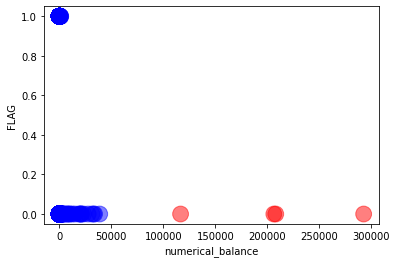

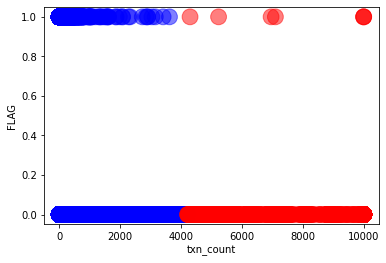

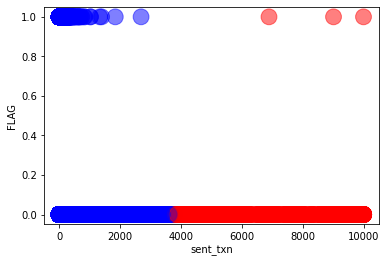

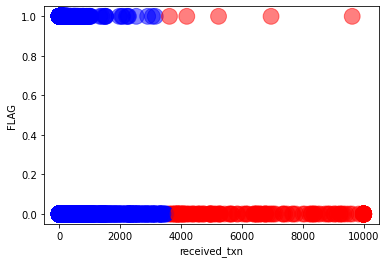

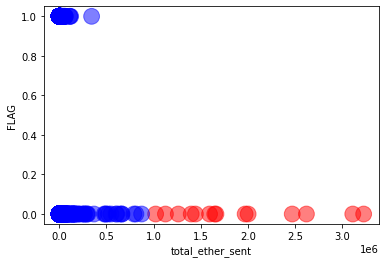

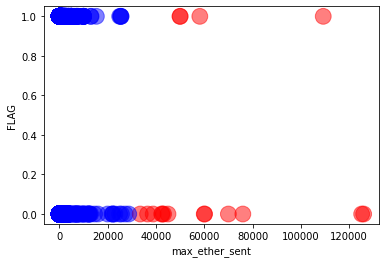

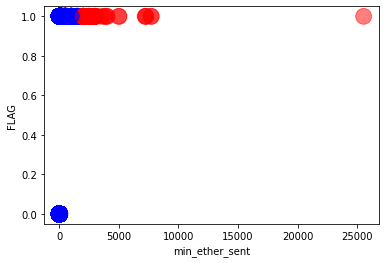

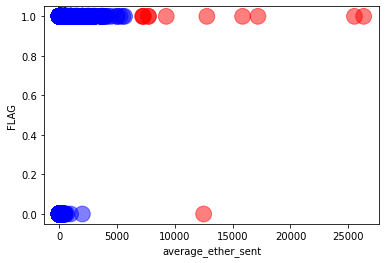

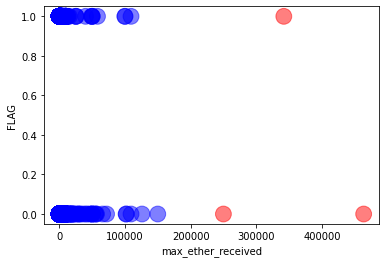

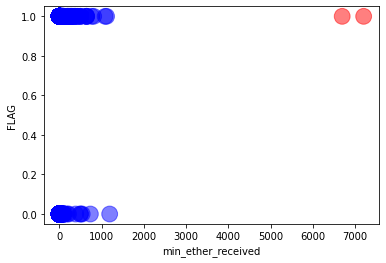

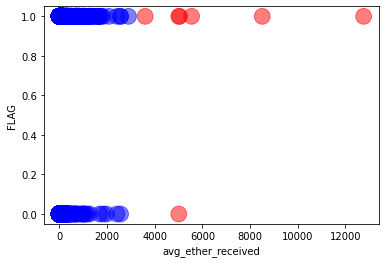

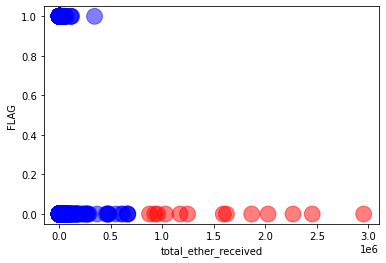

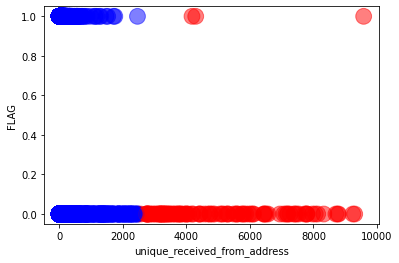

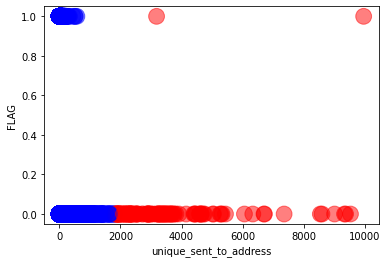

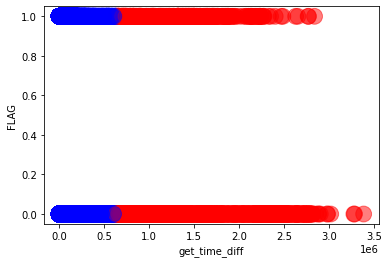

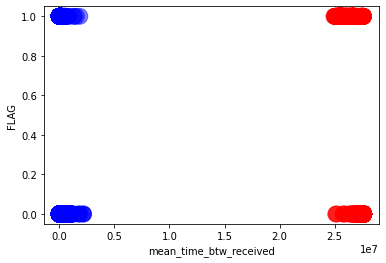

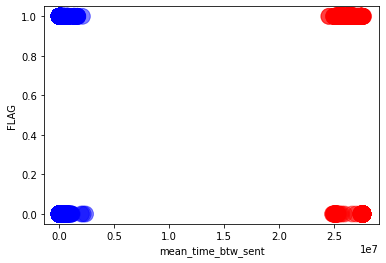

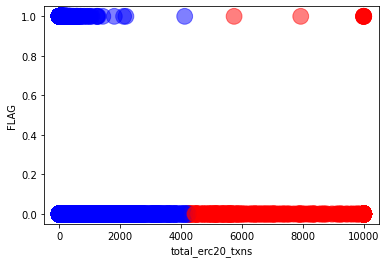

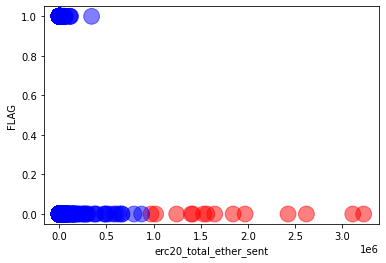

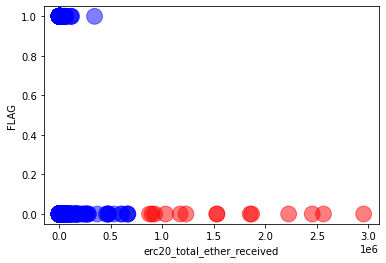

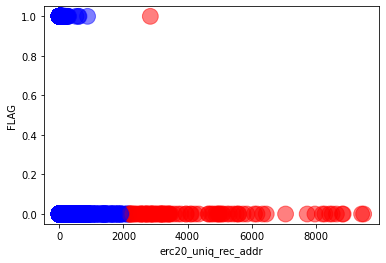

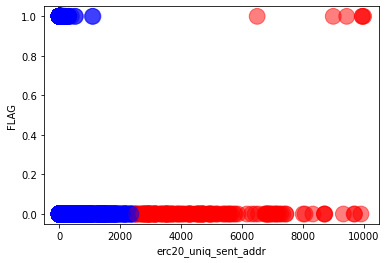

In [59]:
# Get the number of fields (columns) in the dataframe
num_fields = df_22.shape[1] - 1  # subtract 1 to exclude the outcome label

# Iterate over each field (column) in the dataframe
for i in range(num_fields):
    # Extract the field and the outcome label
    field = df_22.iloc[:, i]
    label = df_22.iloc[:, -1]
    
    # Perform k-means clustering with k=2 (binary classification)
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(field.values.reshape(-1, 1))  # reshape field to 2D array for kmeans
    cluster_assignments = kmeans.predict(field.values.reshape(-1, 1))
    
    # Visualize the clustering results
    color_map = {0: 'blue', 1: 'red'}
    colors = [color_map[c] for c in cluster_assignments]  # map cluster assignments to colors
    plt.scatter(field, label, c=colors, alpha=0.5, s=250)
    plt.xlabel(df_22.columns[i])
    plt.ylabel(df_22.columns[-1])
    plt.show()

#### subplots

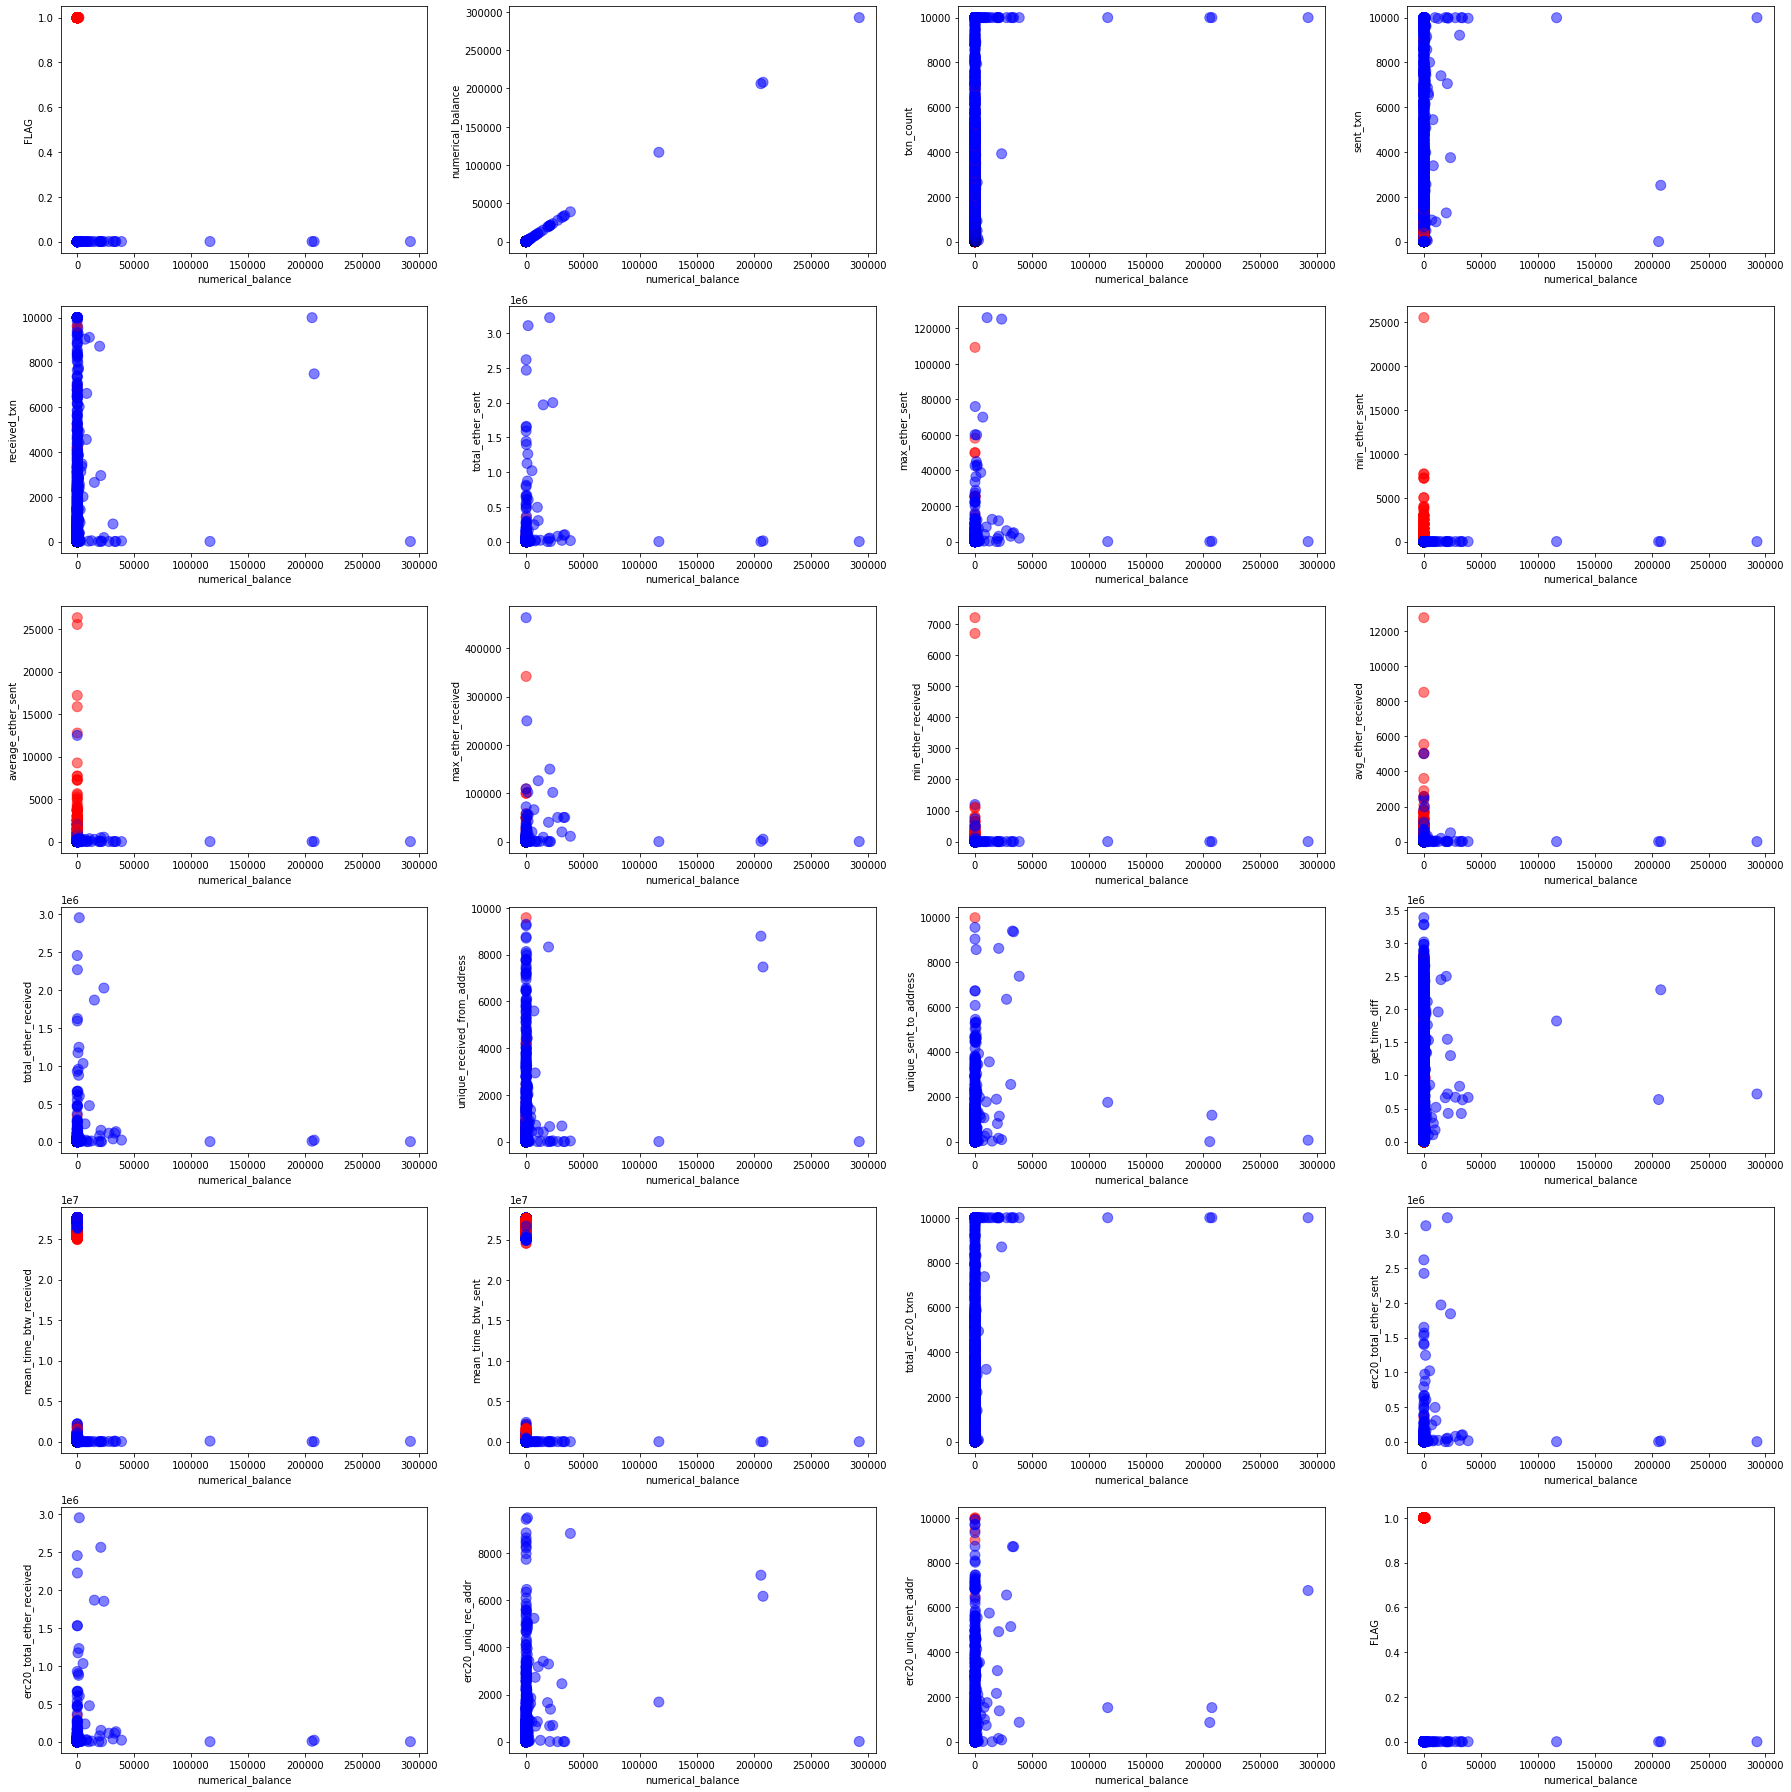

In [10]:
import matplotlib.pyplot as plt

# Get the number of fields (columns) in the dataframe
num_fields = df_22.shape[1] - 1  # subtract 1 to exclude the outcome label

# Iterate over each field (column) in the dataframe
for i in range(num_fields):
    # Extract the field and the outcome label
    field1 = df_22.iloc[:, i]
    label = df_22.iloc[:, -1]
    
    # Set up the subplot grid
    nrows, ncols = 6, 4 #num_fields - i - 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(25, 25))
    
    # Iterate over the remaining fields (columns) in the dataframe
    for j, ax in enumerate(axs.flat):
        field2 = df_22.iloc[:, j+i-1]
        
        # Visualize the data
        color_map = {0: 'blue', 1: 'red'}
        colors = [color_map[l] for l in label]  # map labels to colors
        ax.scatter(field1, field2, c=colors, alpha=0.5, s=100)
        ax.set_xlabel(df_22.columns[i])
        ax.set_ylabel(df_22.columns[j+i-1])
    
    plt.tight_layout()
    plt.show()
    break

##### cross multiply plot

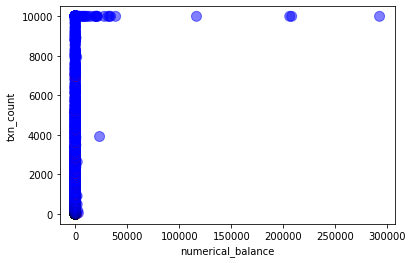

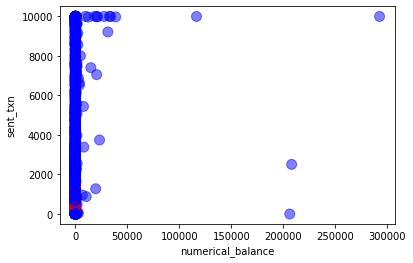

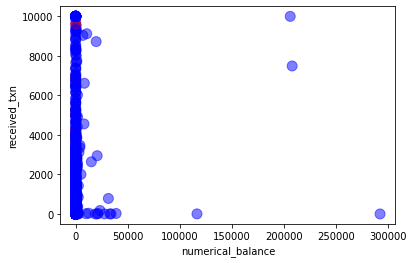

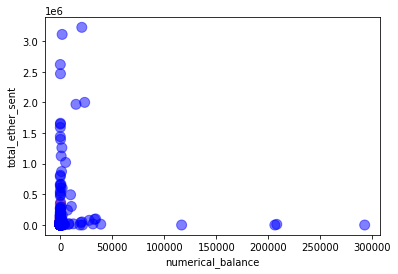

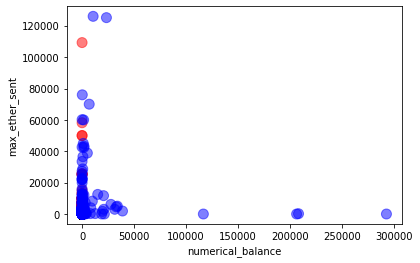

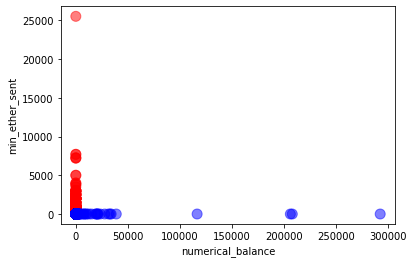

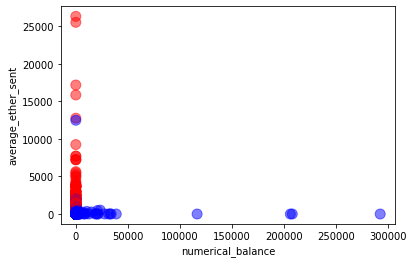

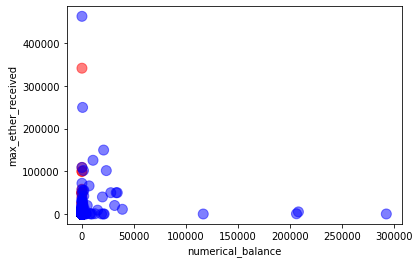

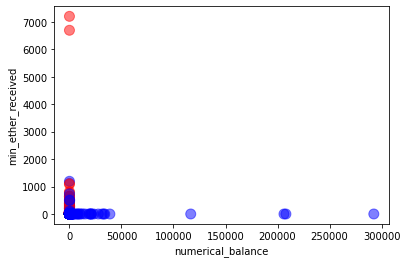

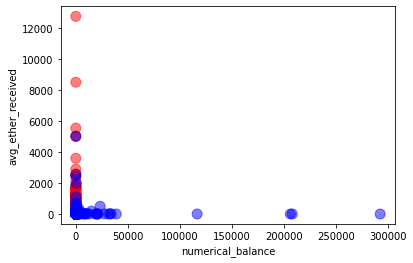

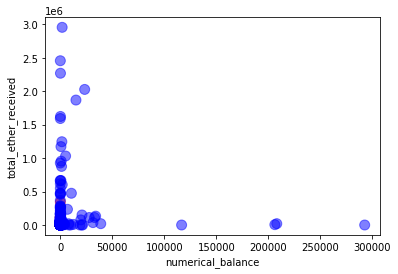

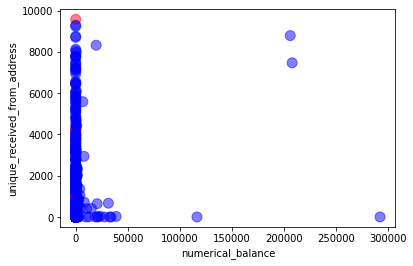

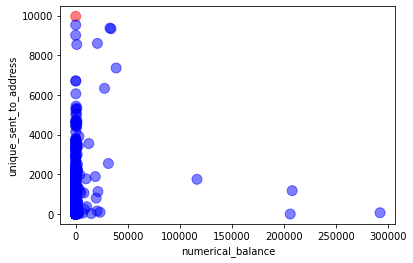

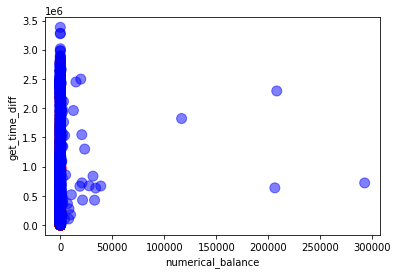

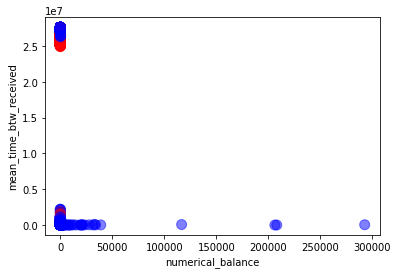

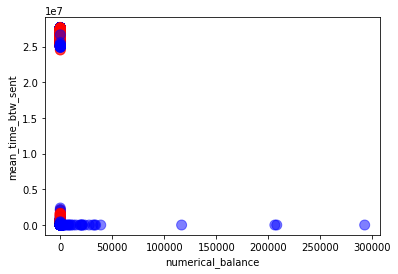

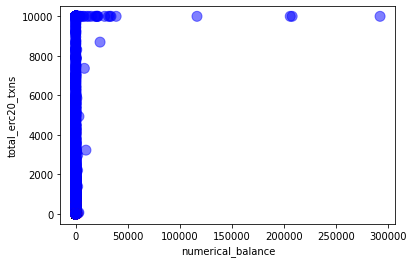

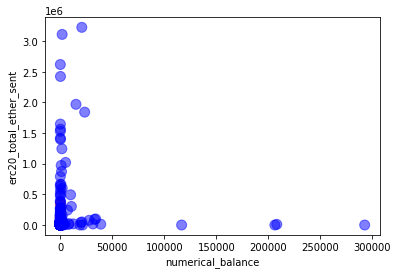

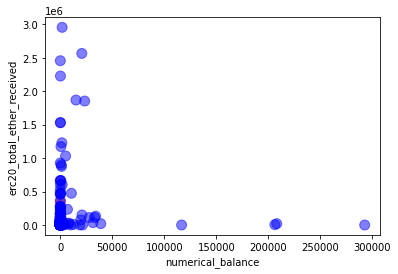

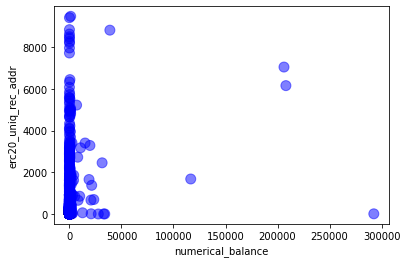

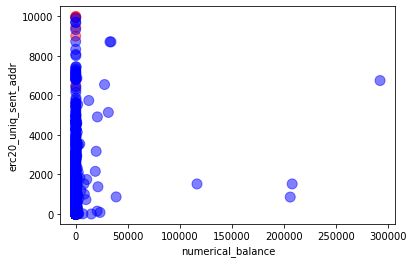

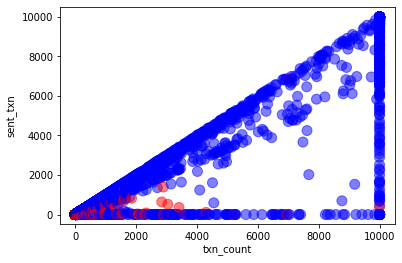

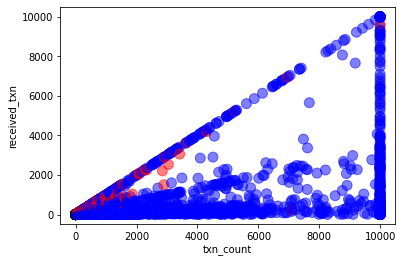

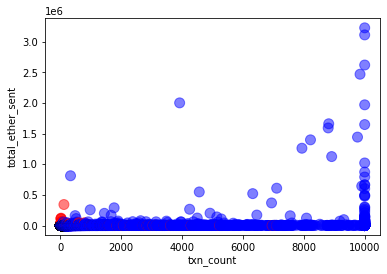

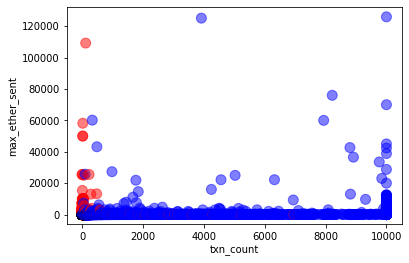

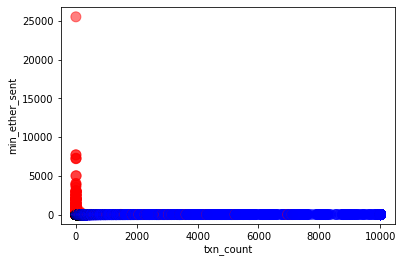

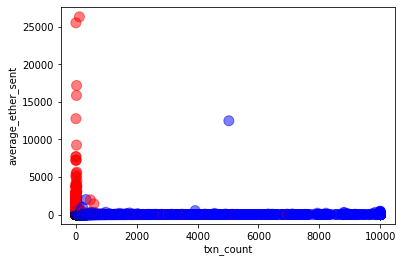

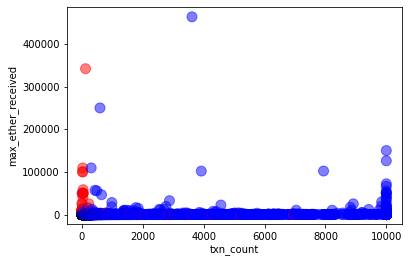

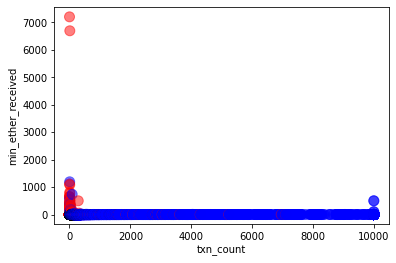

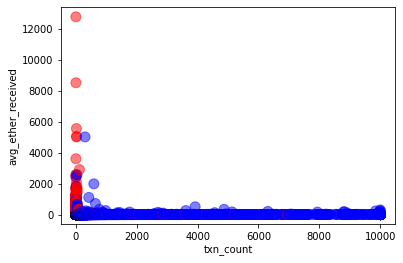

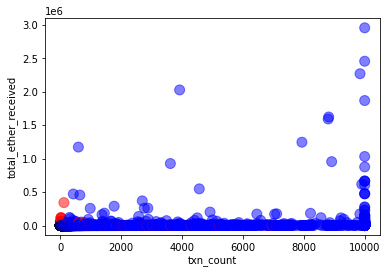

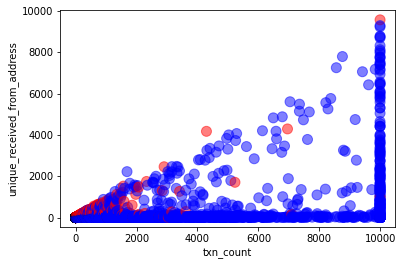

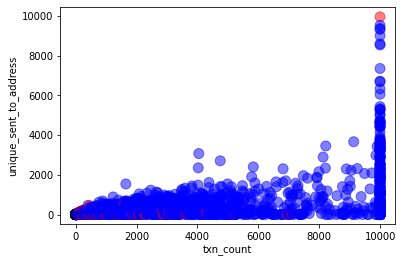

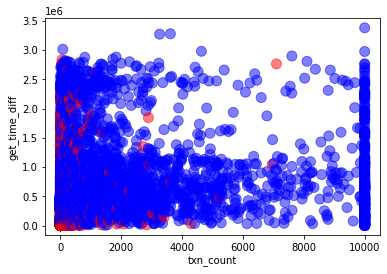

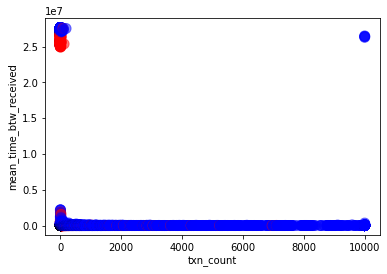

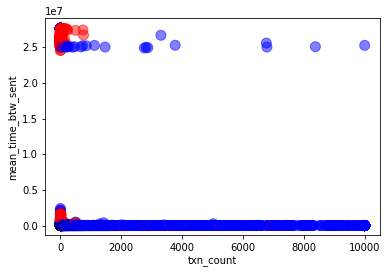

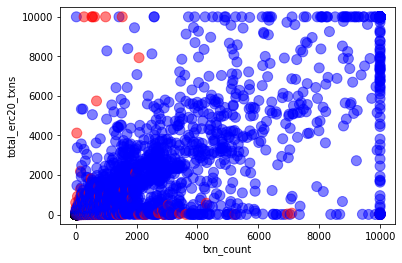

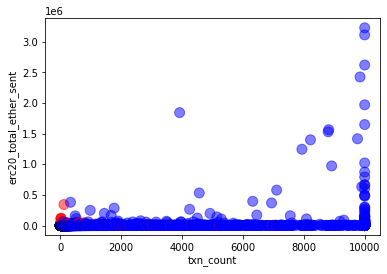

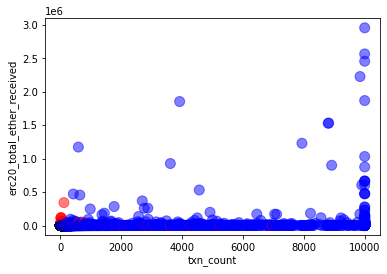

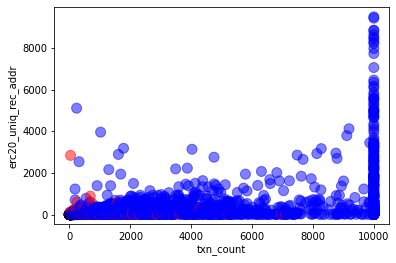

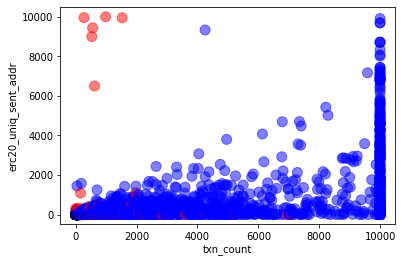

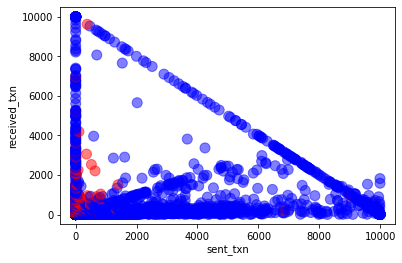

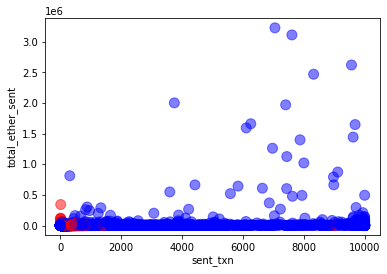

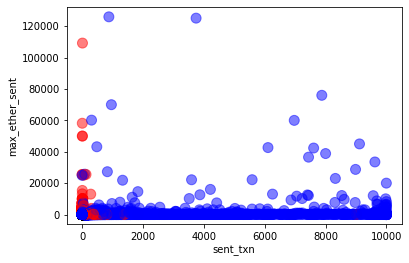

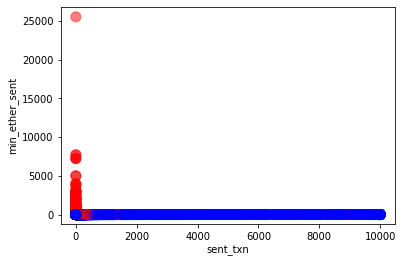

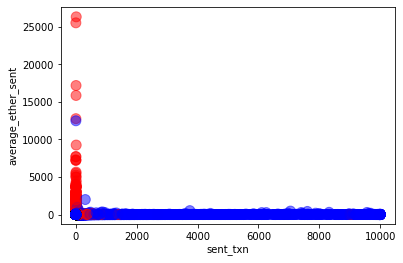

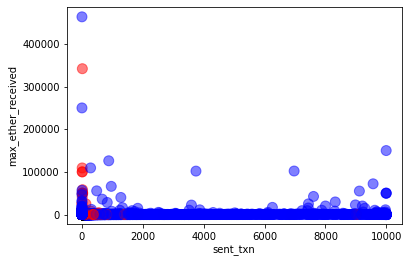

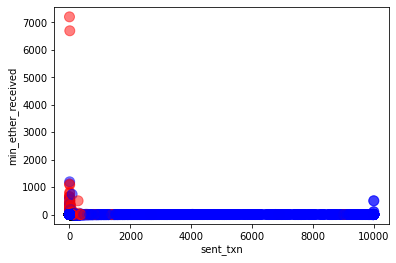

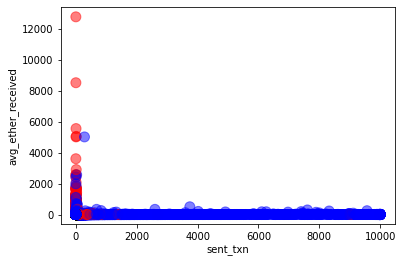

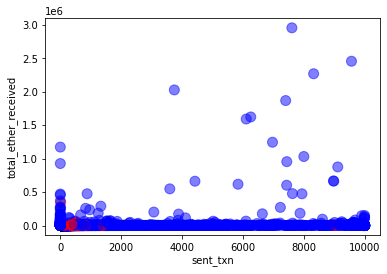

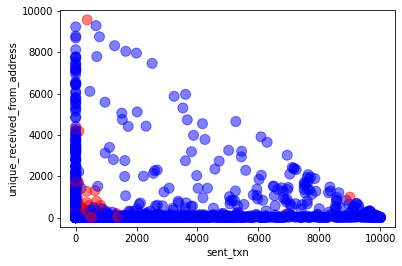

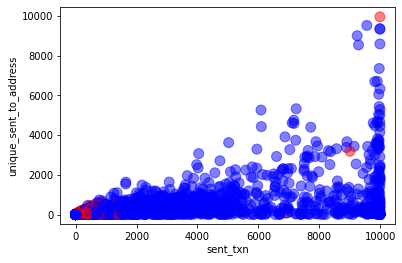

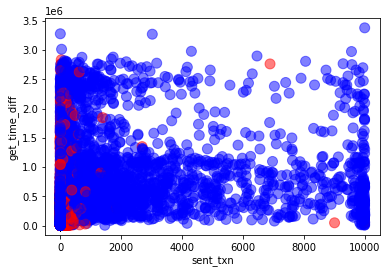

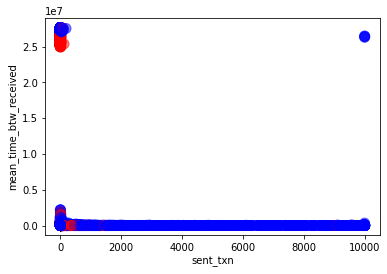

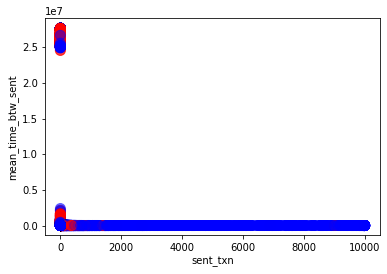

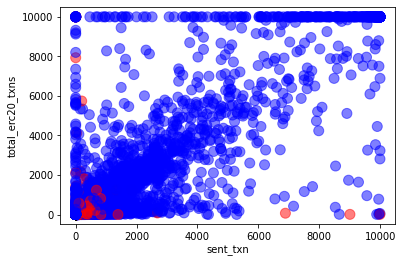

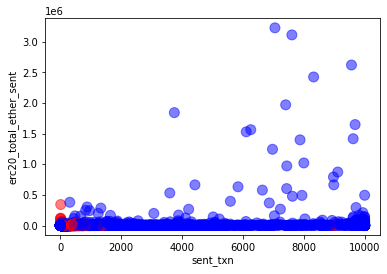

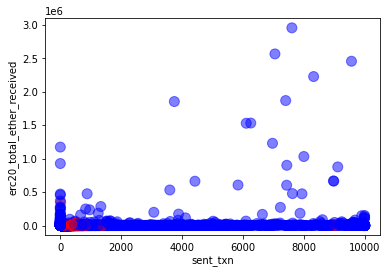

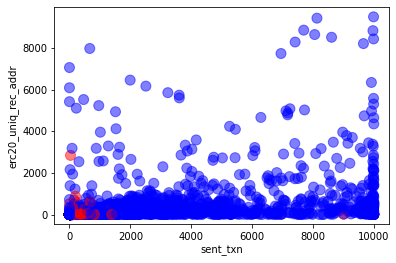

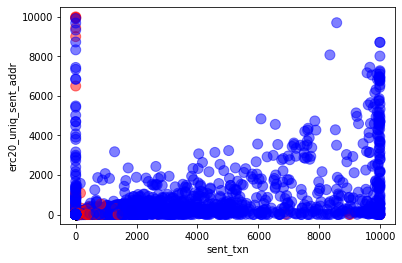

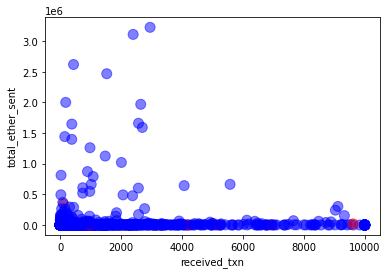

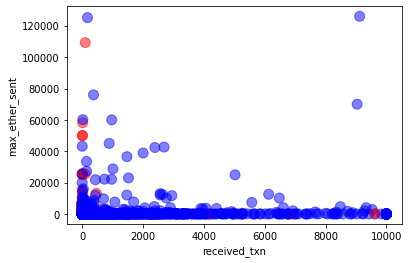

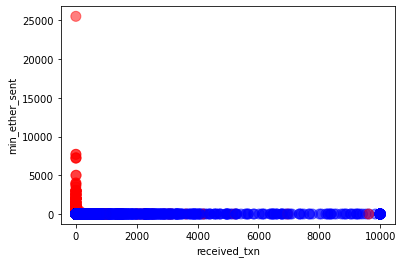

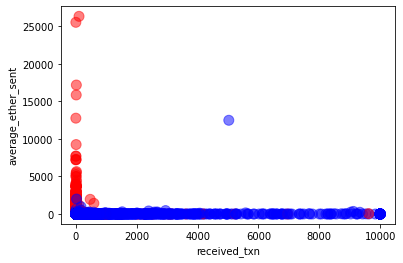

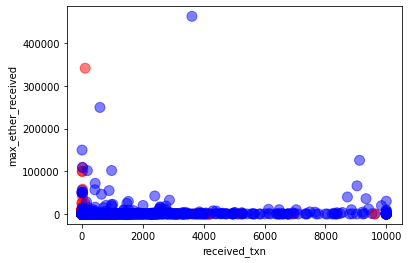

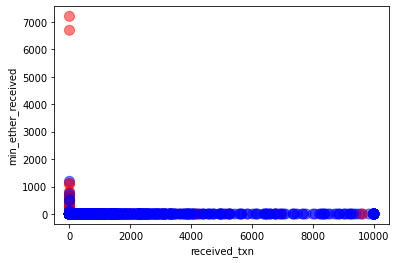

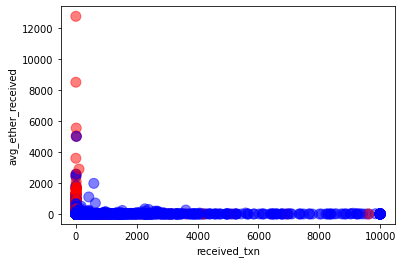

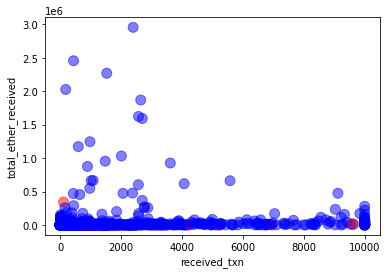

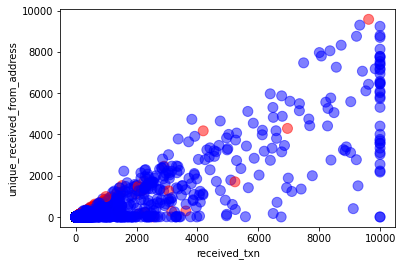

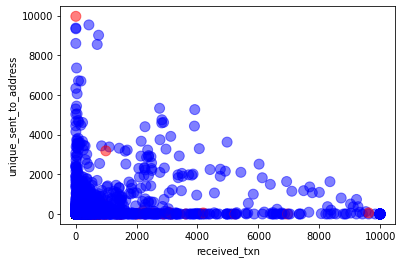

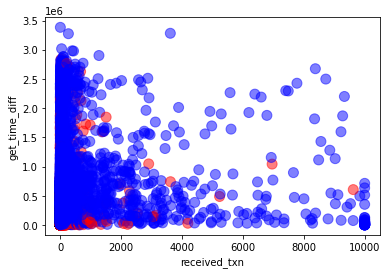

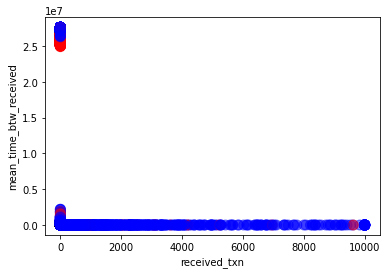

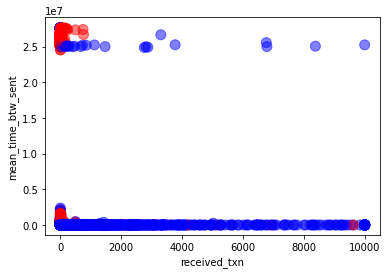

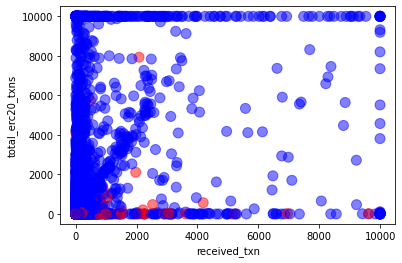

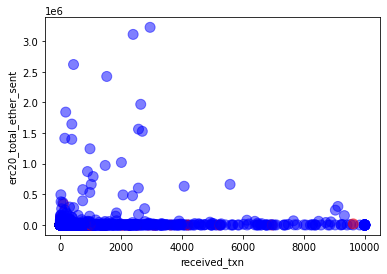

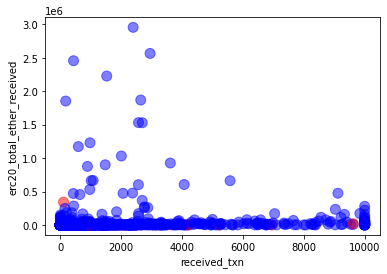

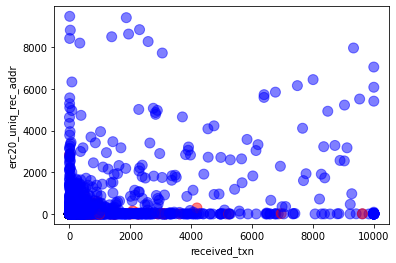

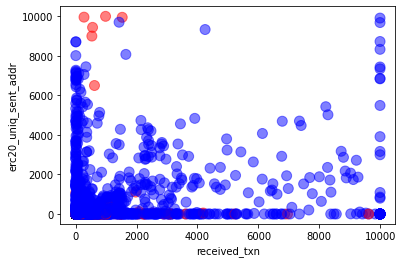

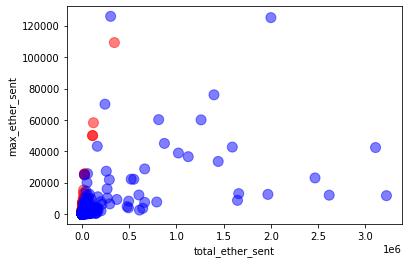

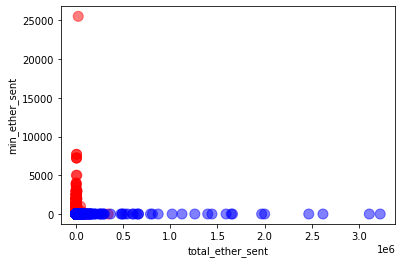

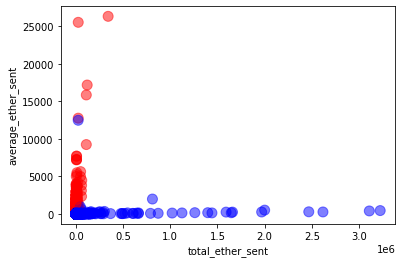

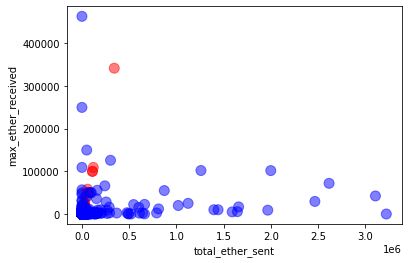

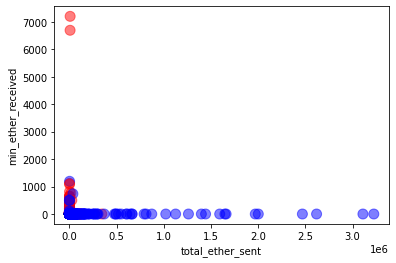

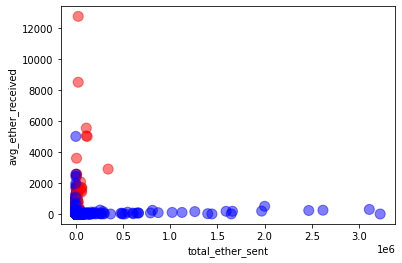

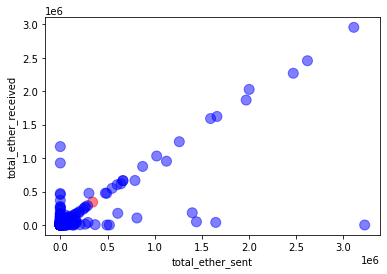

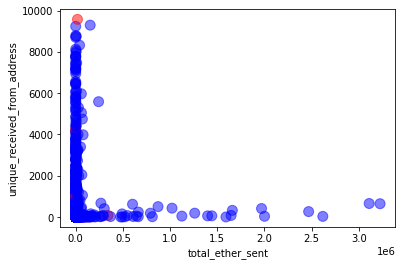

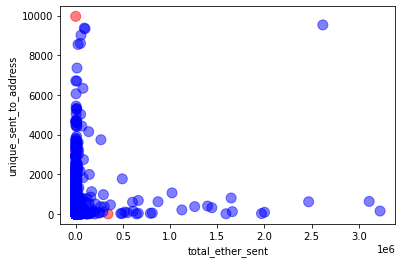

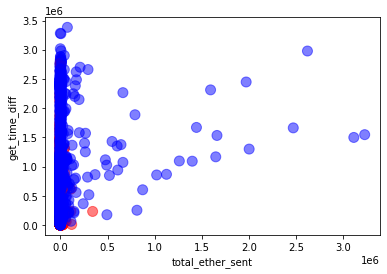

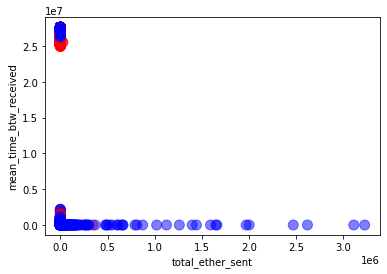

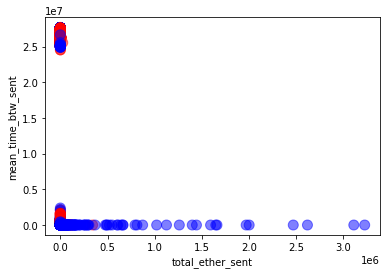

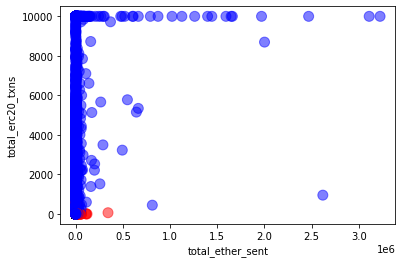

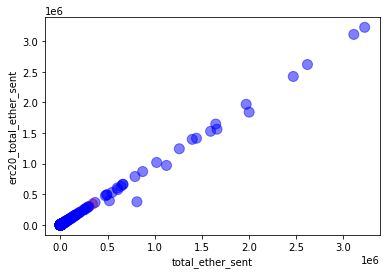

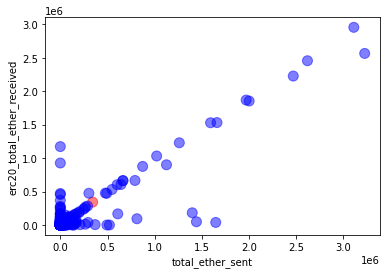

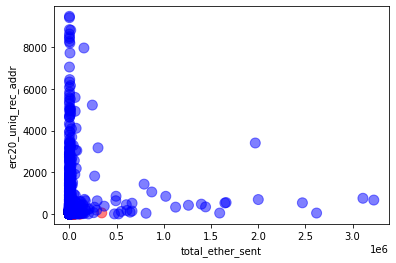

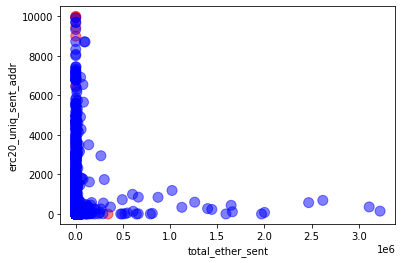

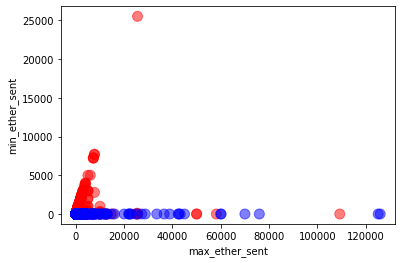

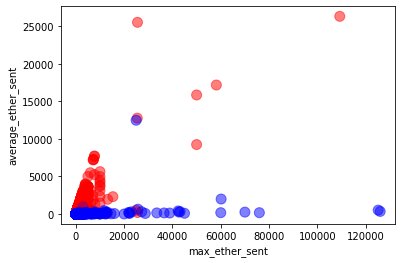

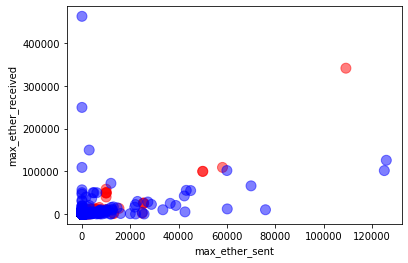

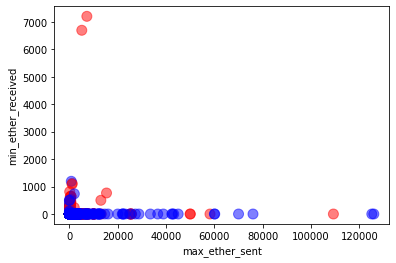

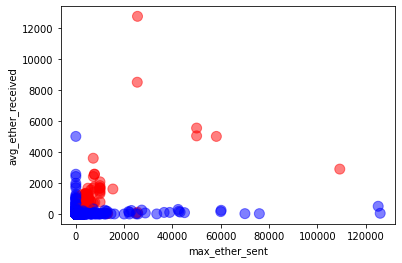

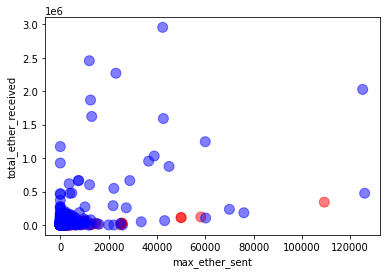

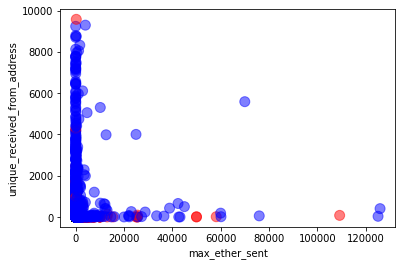

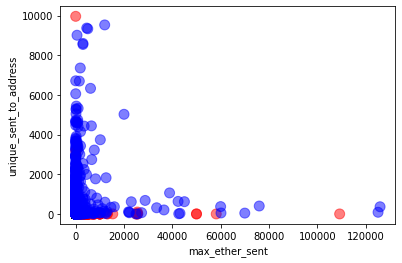

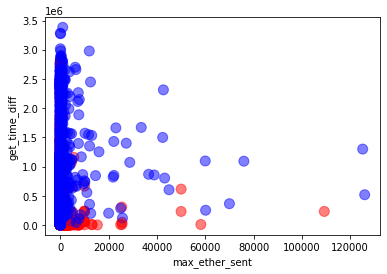

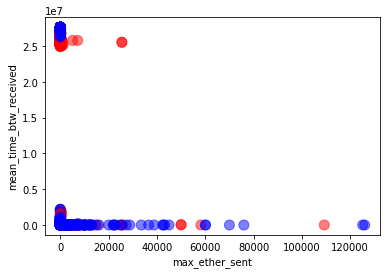

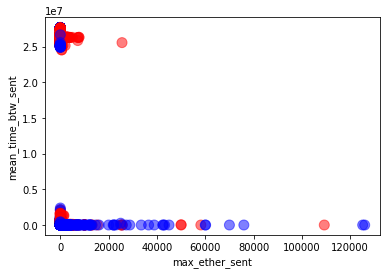

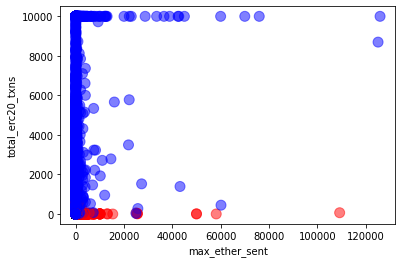

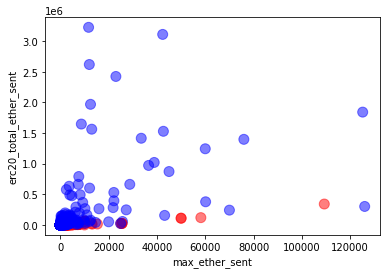

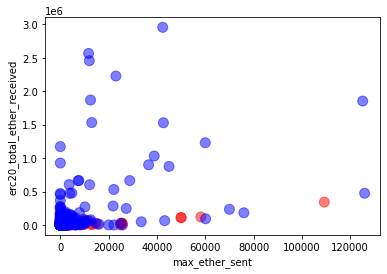

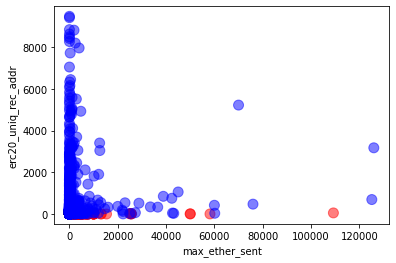

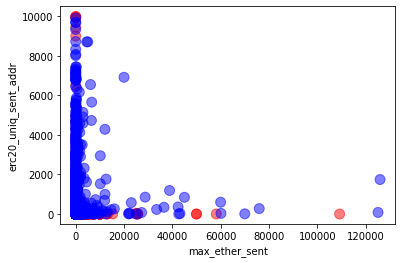

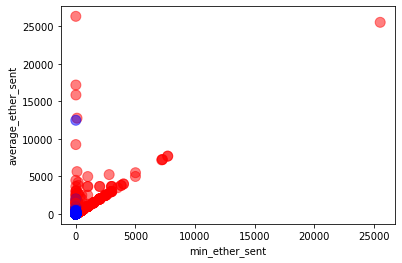

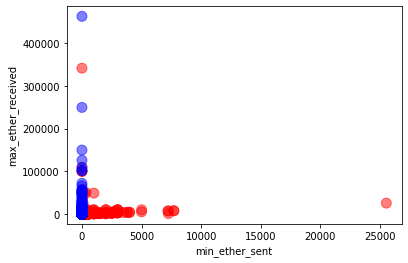

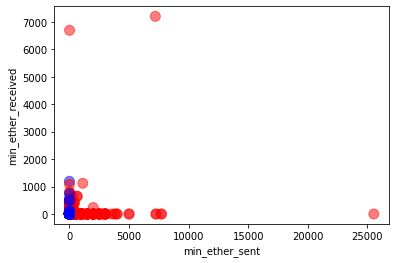

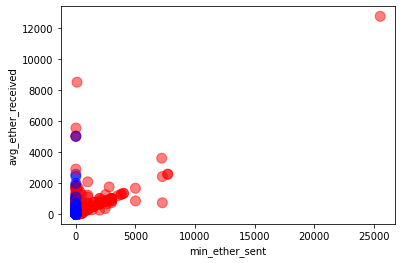

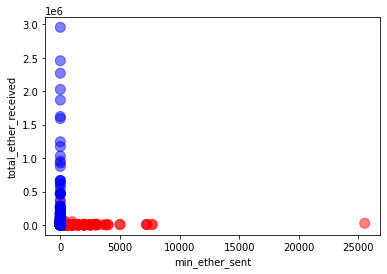

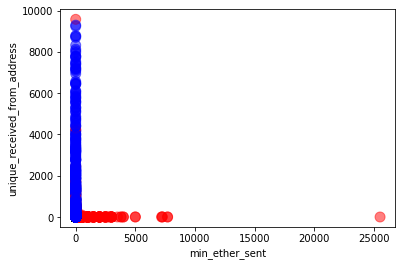

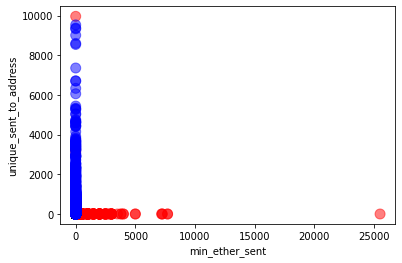

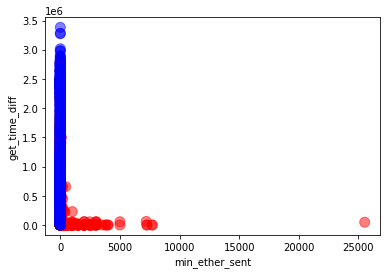

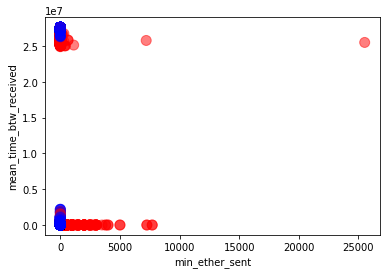

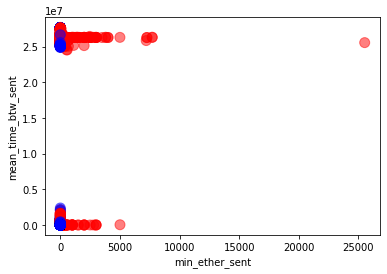

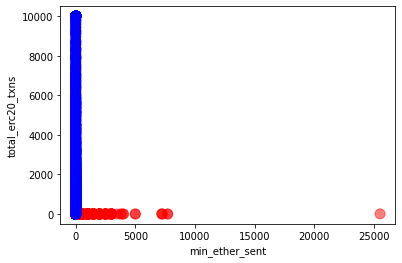

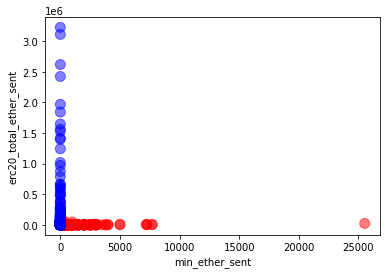

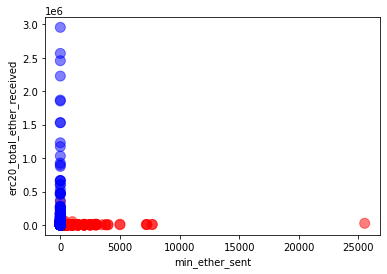

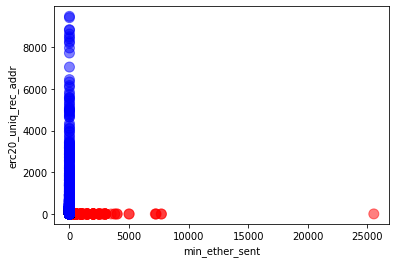

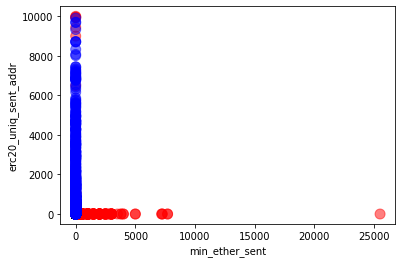

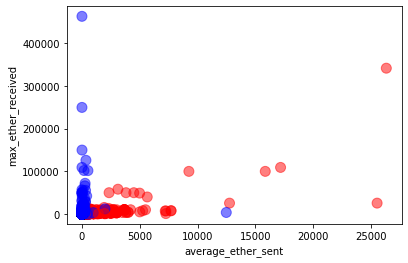

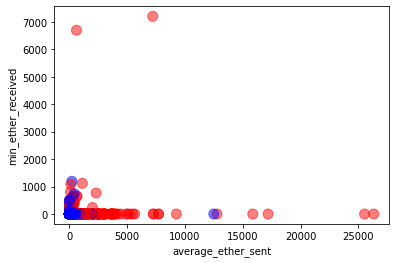

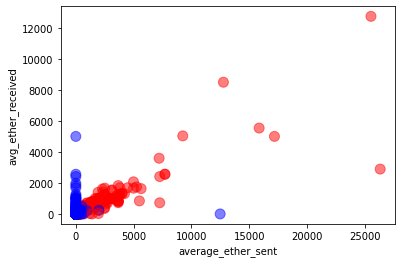

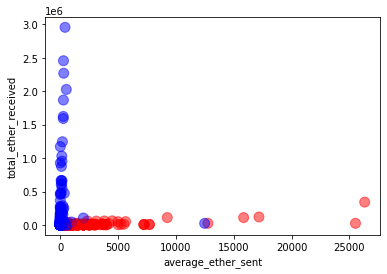

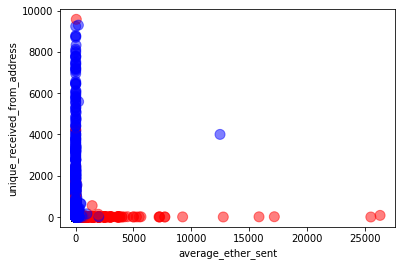

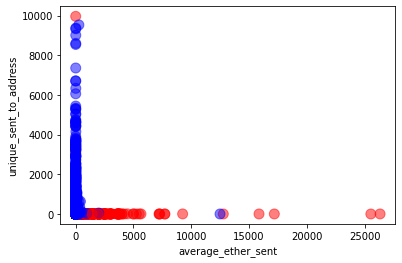

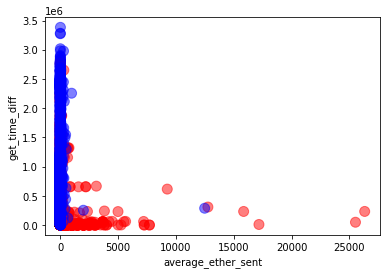

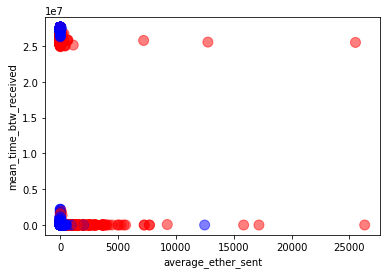

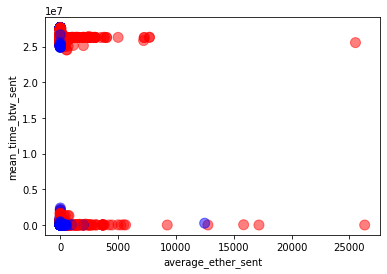

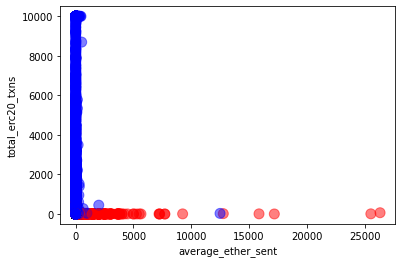

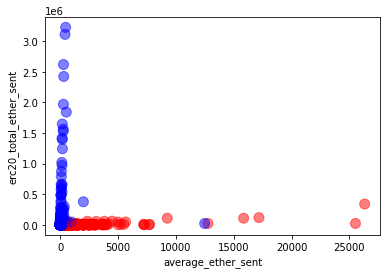

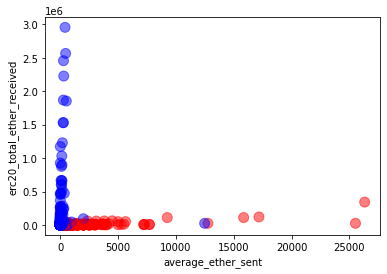

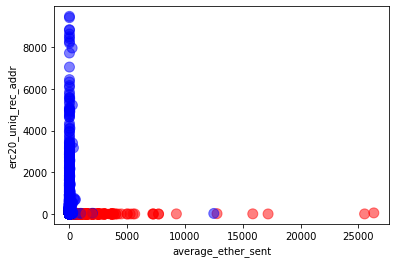

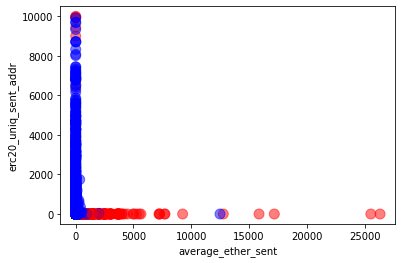

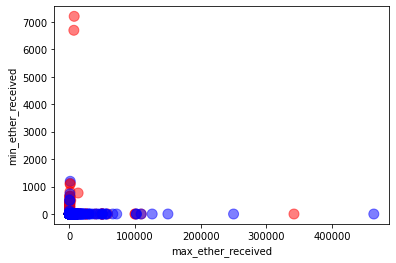

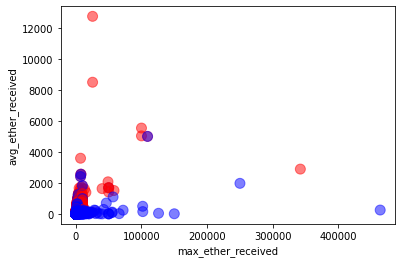

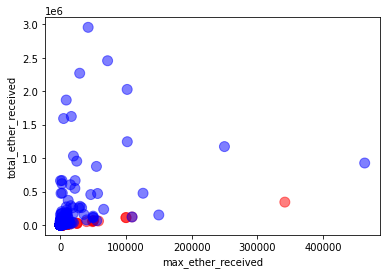

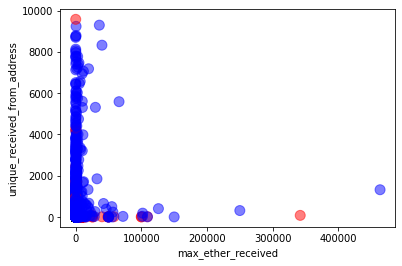

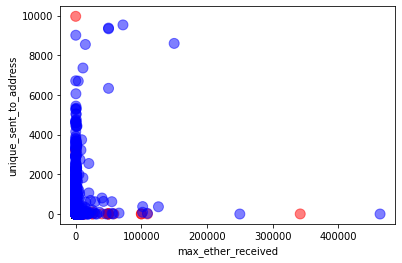

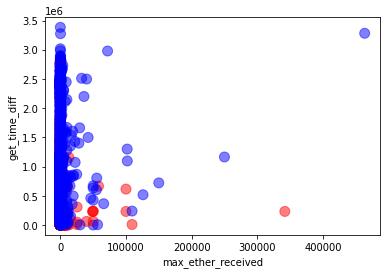

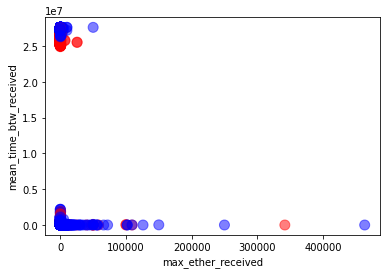

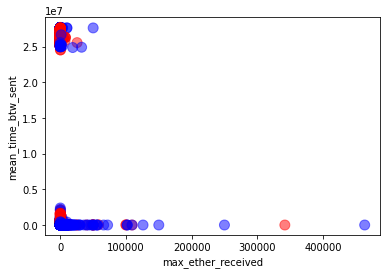

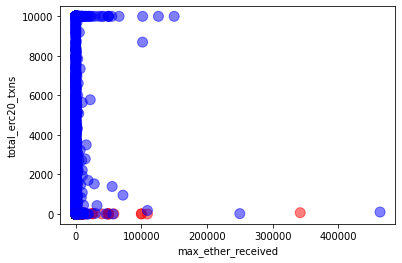

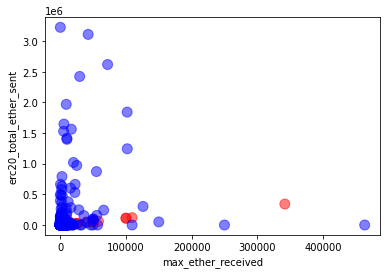

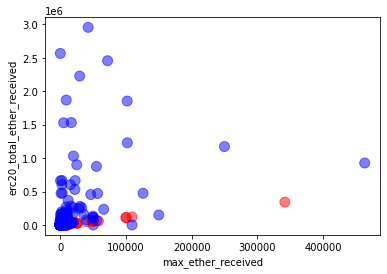

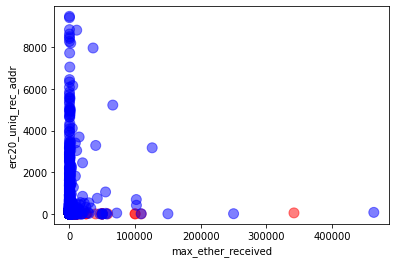

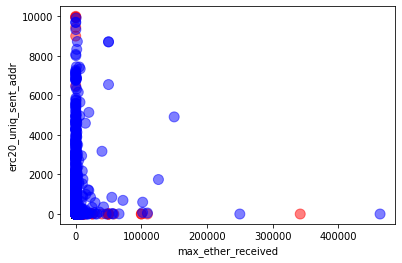

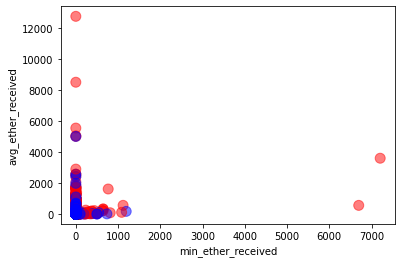

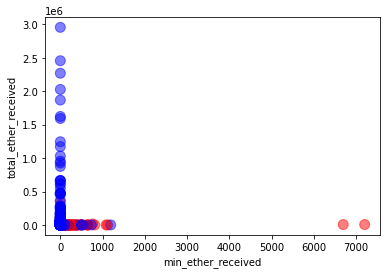

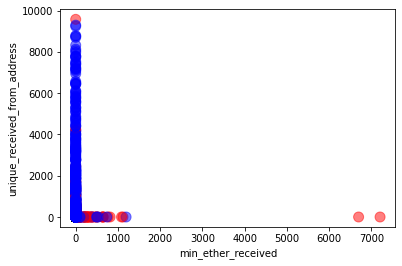

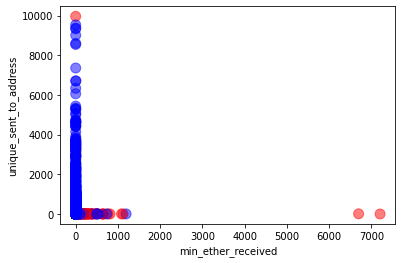

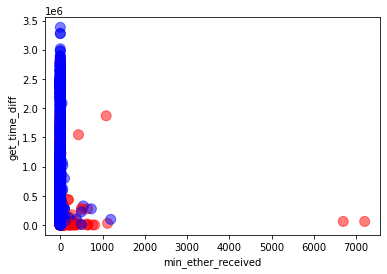

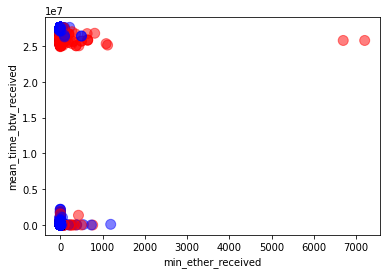

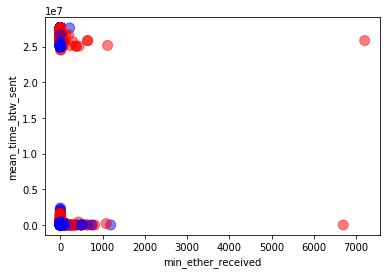

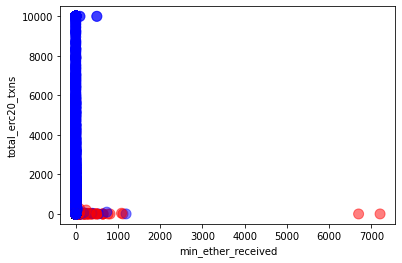

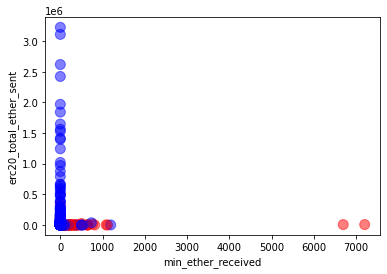

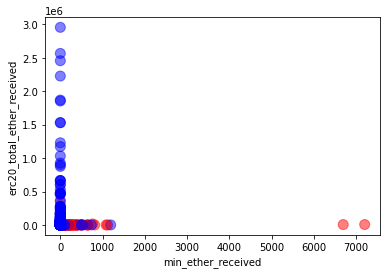

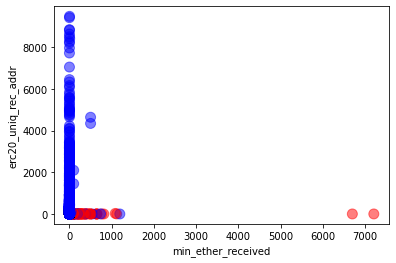

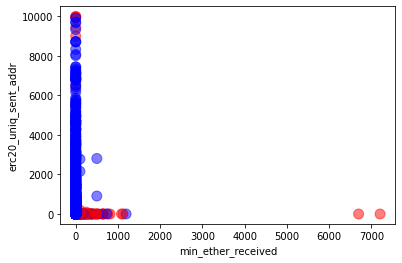

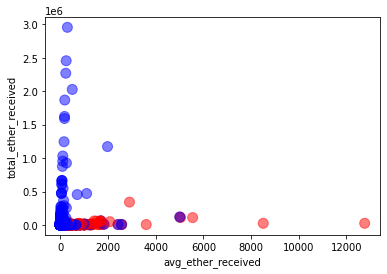

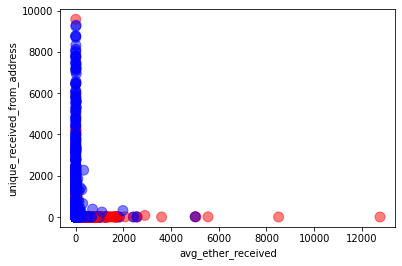

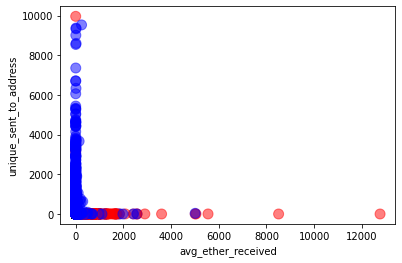

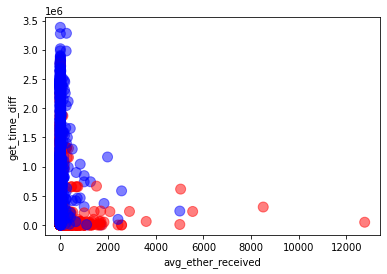

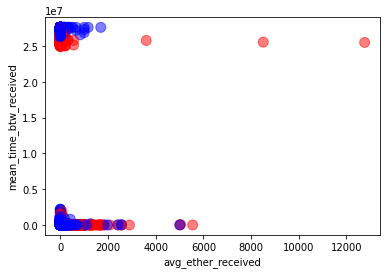

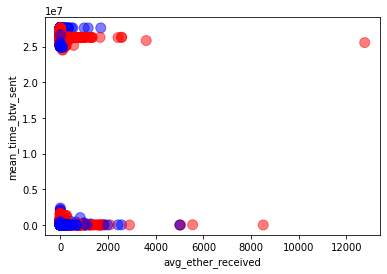

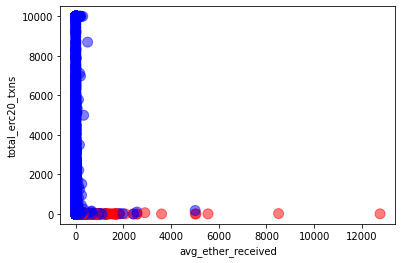

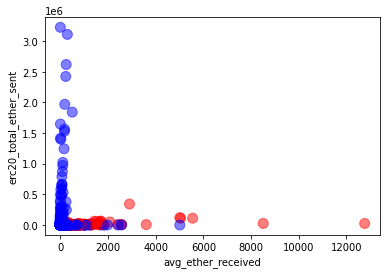

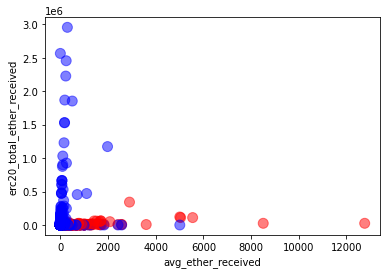

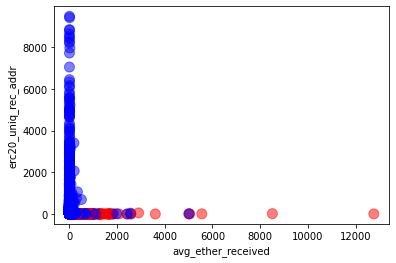

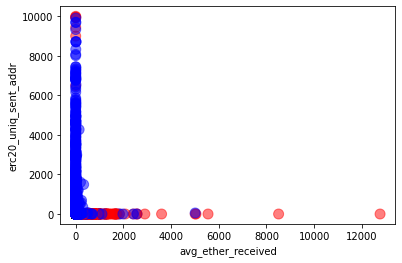

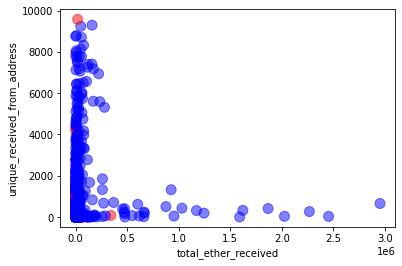

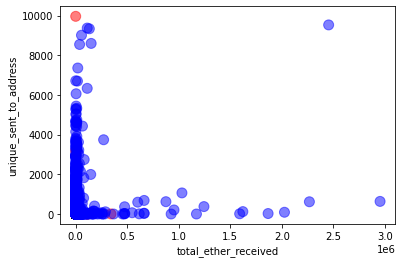

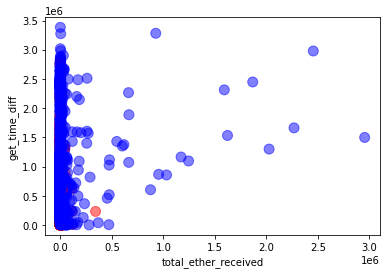

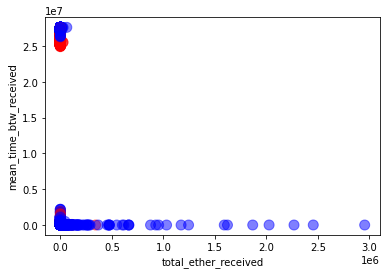

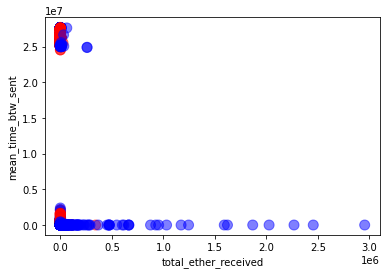

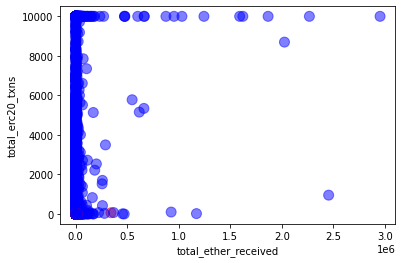

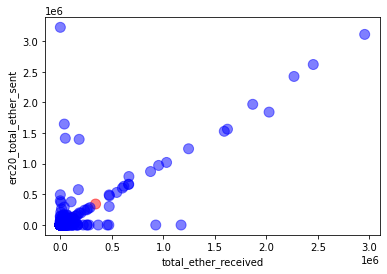

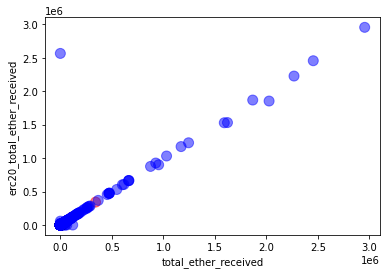

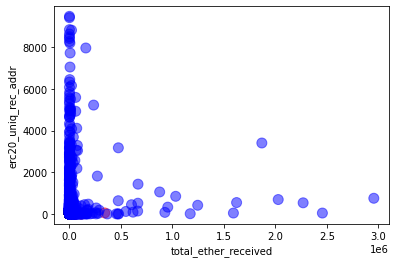

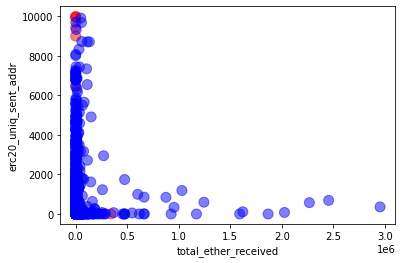

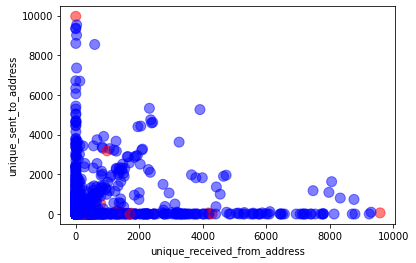

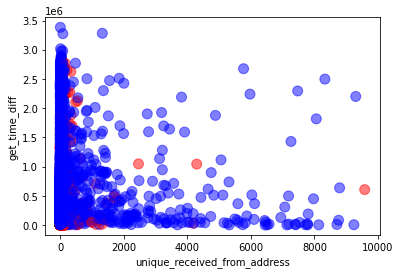

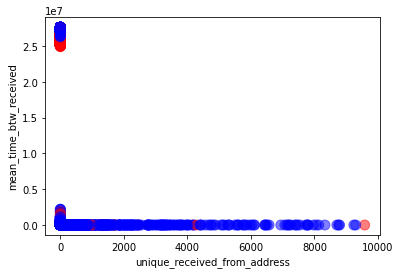

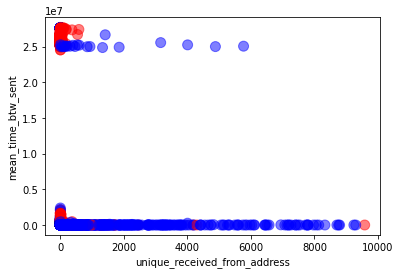

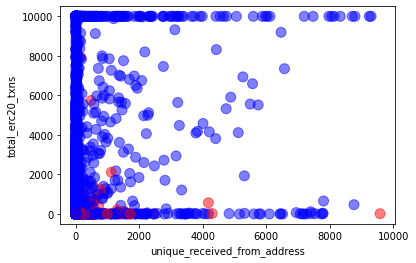

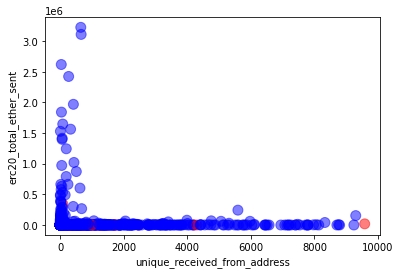

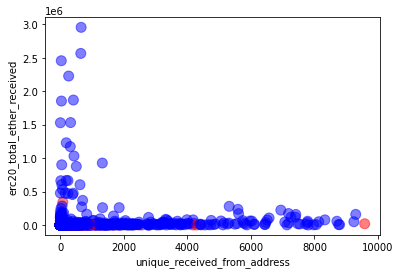

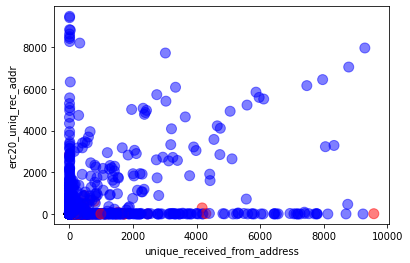

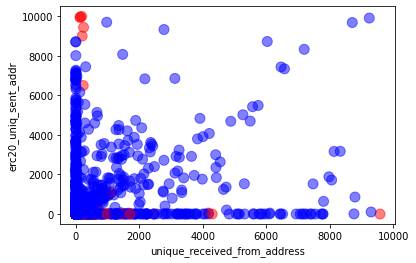

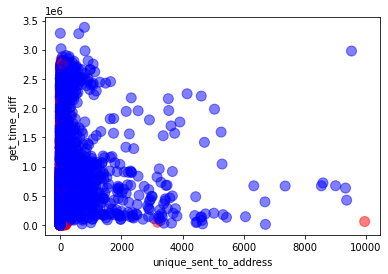

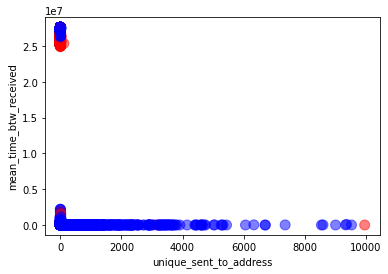

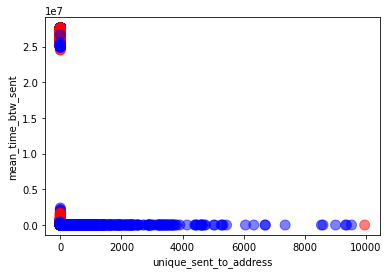

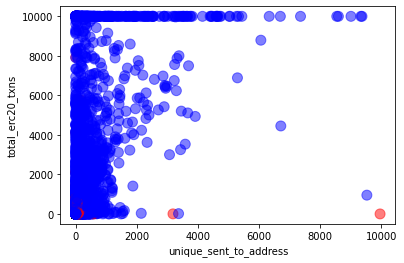

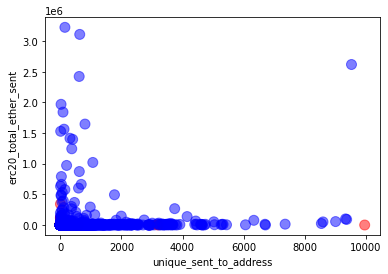

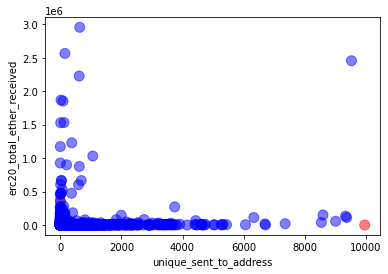

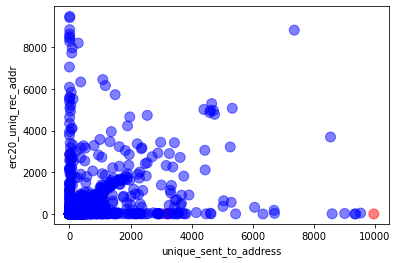

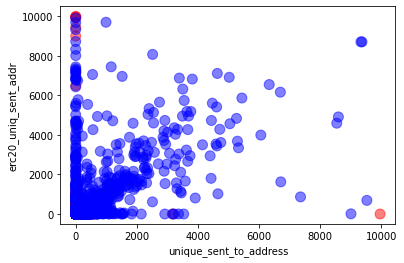

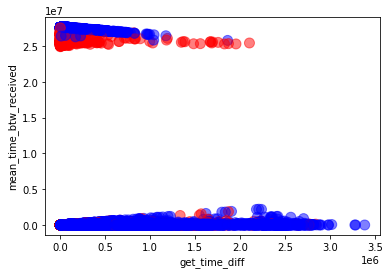

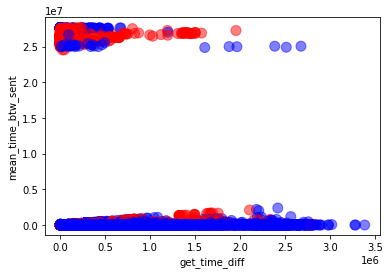

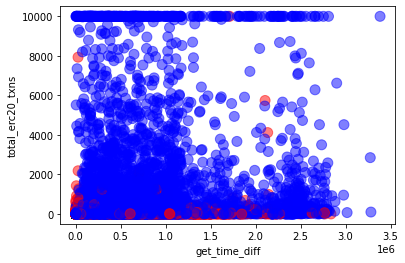

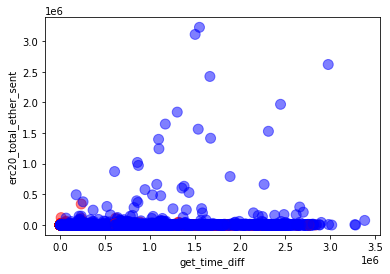

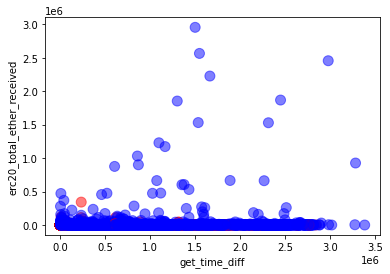

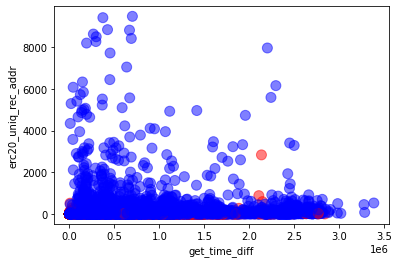

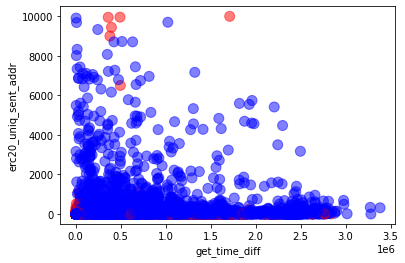

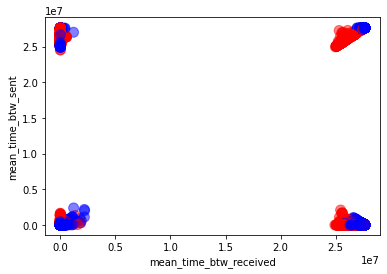

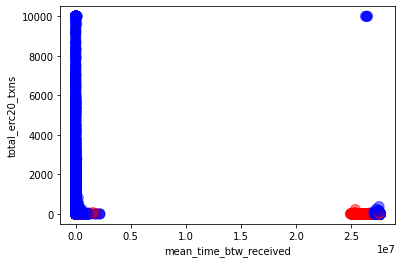

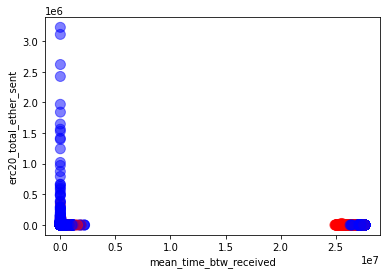

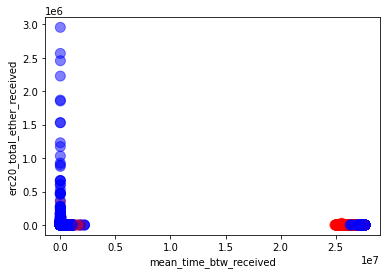

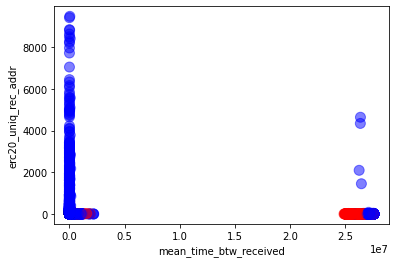

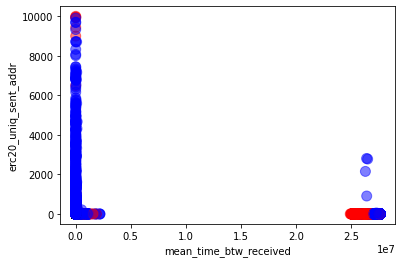

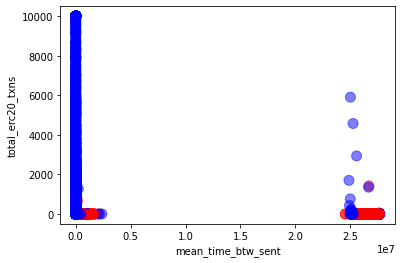

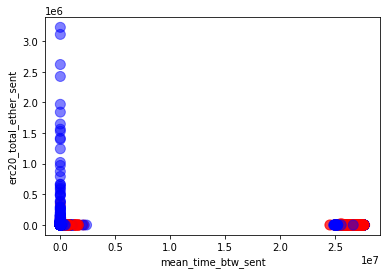

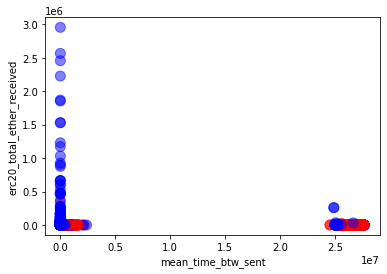

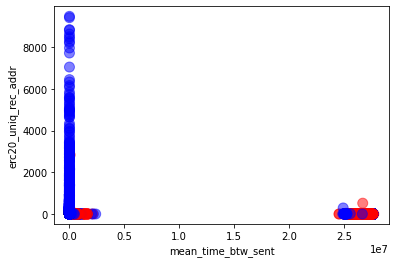

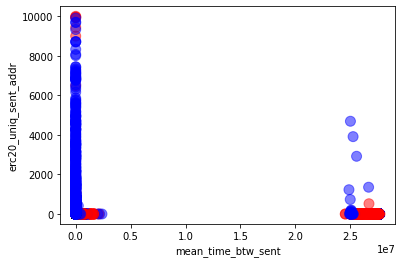

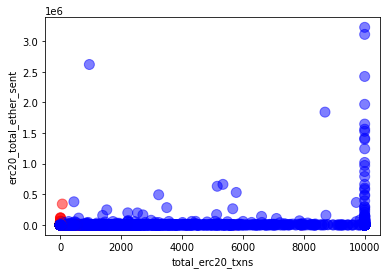

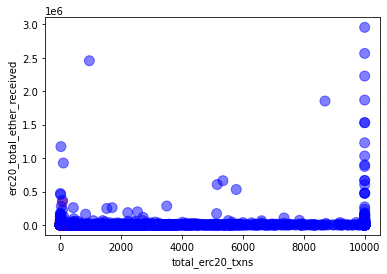

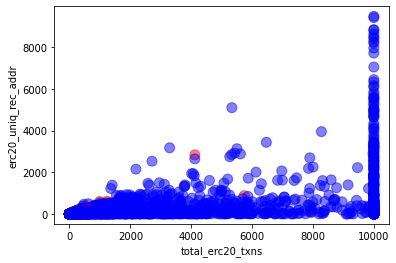

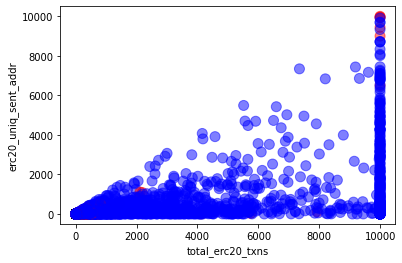

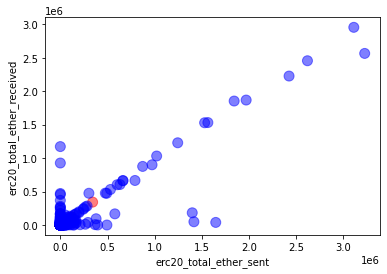

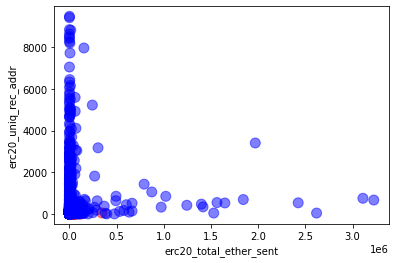

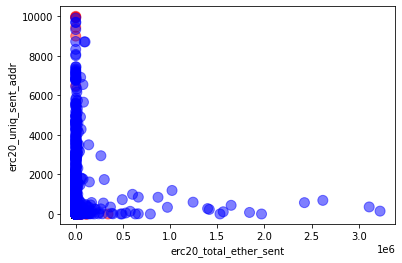

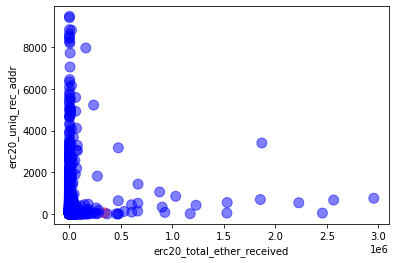

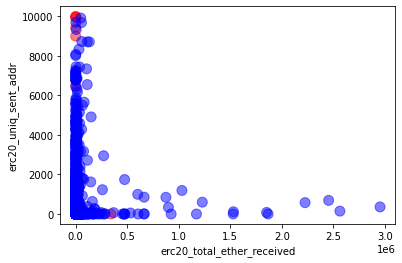

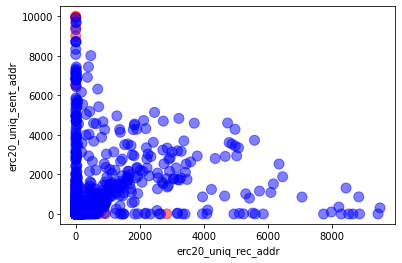

In [61]:
import matplotlib.pyplot as plt

# Get the number of fields (columns) in the dataframe
num_fields = df_22.shape[1] - 1  # subtract 1 to exclude the outcome label

# Iterate over each field (column) in the dataframe
for i in range(num_fields):
    # Extract the field and the outcome label
    field1 = df_22.iloc[:, i]
    label = df_22.iloc[:, -1]
    
    # Iterate over the remaining fields (columns) in the dataframe
    for j in range(i+1, num_fields):
        field2 = df_22.iloc[:, j]
        
        # Visualize the data
        color_map = {0: 'blue', 1: 'red'}
        colors = [color_map[l] for l in label]  # map labels to colors
        plt.scatter(field1, field2, c=colors, alpha=0.5, s=100)
        plt.xlabel(df_22.columns[i])
        plt.ylabel(df_22.columns[j])
        plt.show()